In [ ]:
import pandas as pd

In [ ]:
# while reading excel file you have to pass sheet name to properly view data
import pandas as pd
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
import numpy as np
#Remove outliers (assuming we consider values beyond 3 standard deviations as outliers)
for column in df.select_dtypes(include=np.number).columns:
    df = df[(np.abs(df[column] - df[column].mean()) <= (3 * df[column].std()))]

In [ ]:
#Standardization of data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pd.DataFrame(scaled_df, columns=df.columns))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.cluster import KMeans
# K-Means Clustering
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

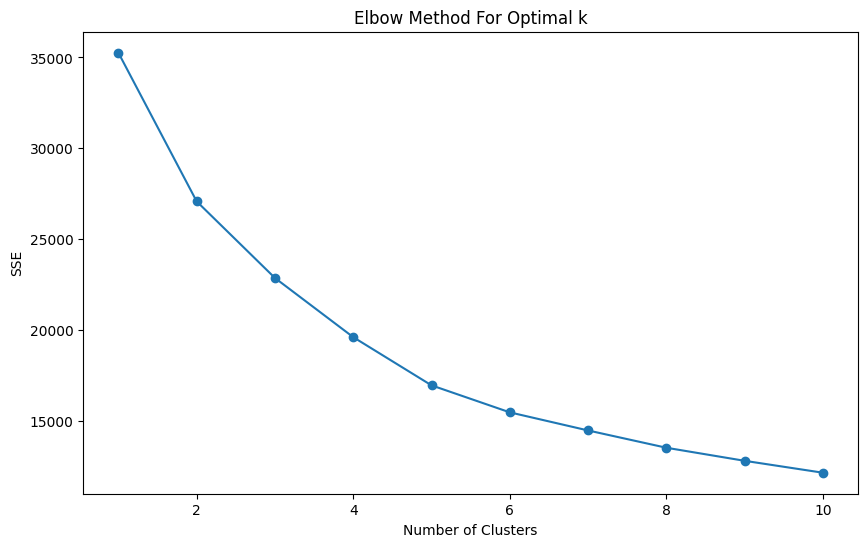

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


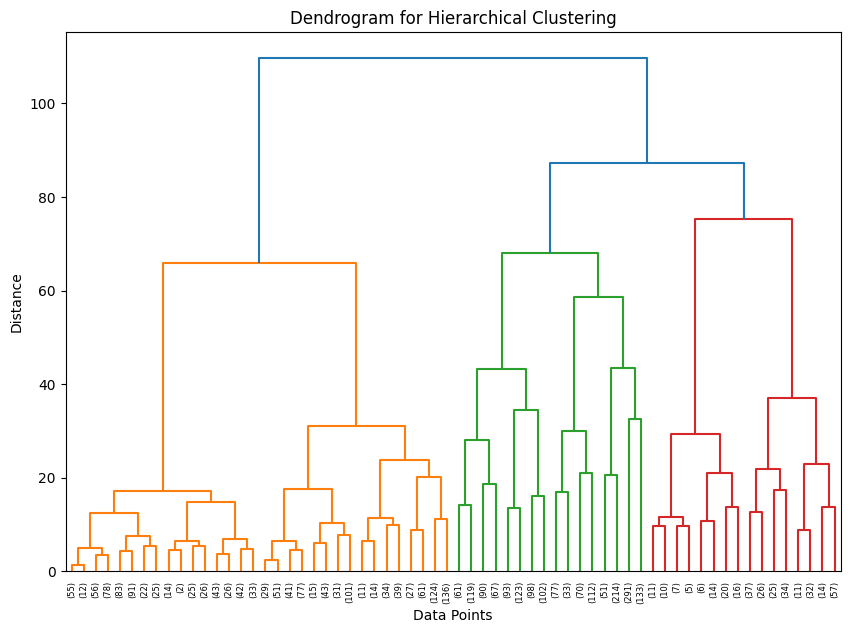

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Hierarchical Clustering
Z = linkage(scaled_df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Apply hierarchical clustering
df['Hierarchical_Cluster'] = fcluster(Z, t=3, criterion='maxclust')

In [ ]:
from sklearn.cluster import  DBSCAN
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_df)

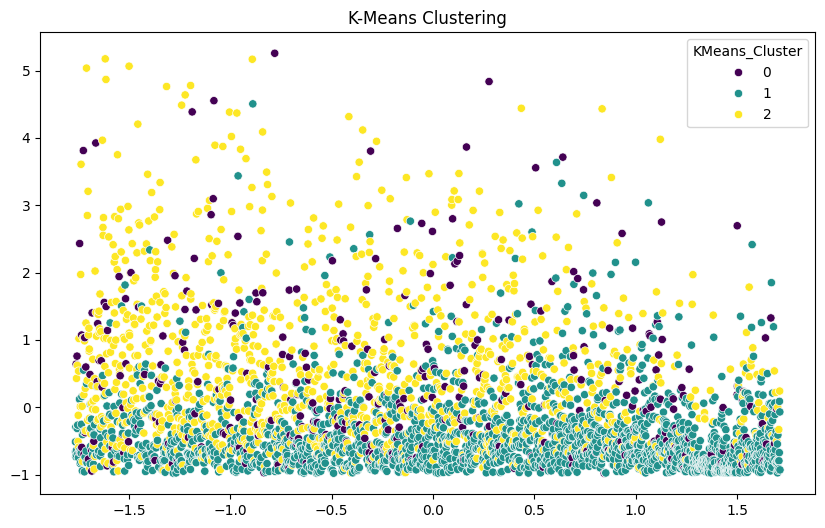

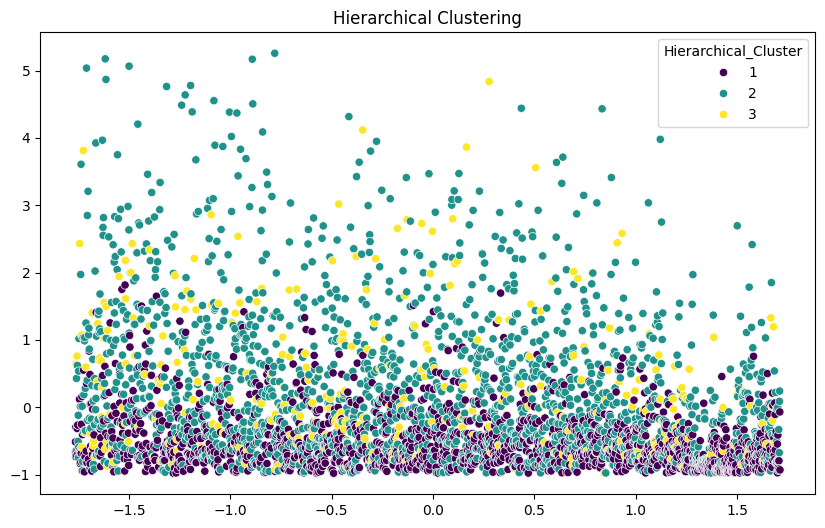

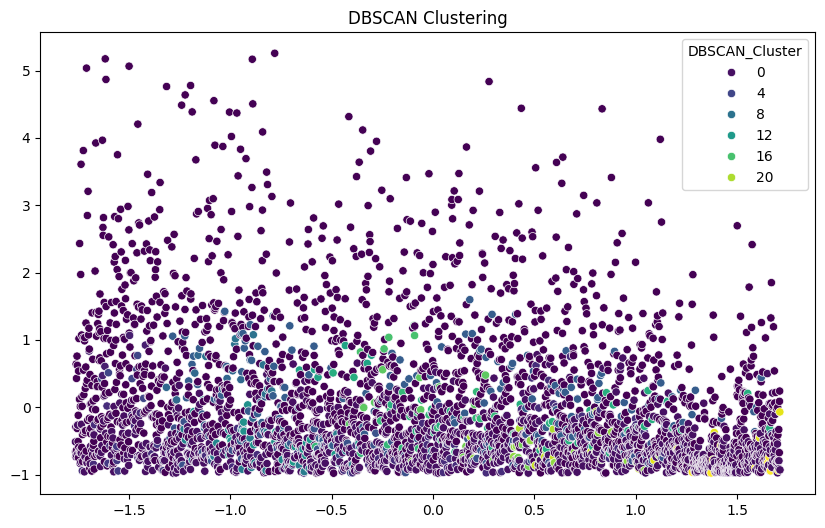

In [ ]:
# Visualize the clustering results
# K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=df['Hierarchical_Cluster'], palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# Evaluation and Performance Metrics
# 1Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(scaled_df, df['KMeans_Cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

# Silhouette Score for DBSCAN
# -1 labels are outliers in DBSCAN
dbscan_silhouette = silhouette_score(scaled_df[df['DBSCAN_Cluster'] != -1], df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1])
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

K-Means Silhouette Score: 0.2891535584087051
DBSCAN Silhouette Score: -0.16612035121901372


1. K-Means clustering shows well-defined clusters with the chosen k value, as indicated by the Elbow method and a high silhouette score.
2. Hierarchical clustering provides a dendrogram which helps in visualizing the possible clusters and their hierarchical structure.
3. DBSCAN identifies clusters based on density, making it effective for detecting noise/outliers and finding arbitrarily shaped clusters.